# Notebook VI - Economic Suitability Analysis

*BETA version - under development and in testing phase*

This module is fully referred to NAEZ Thailand (2016) to evaluate the yield suitability based on net revenue returned from the crop yield.

<hr>
<hr>


### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal
# # !pip install pyaez==2.1.0

## Importing Libraries

In [1]:
'''import supporting libraries'''
# import pyaez
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Setting the working directory -- where our PyAEZ project is located.

In [2]:
'Set the working directory'
# work_dir = r'/content/gdrive/MyDrive/PyAEZv2/'
work_dir = r'D:\PyAEZv2.1_Draft'
os.chdir(work_dir)
sys.path.append('./pyaez/')
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


## Preparing Data

In [3]:
'''preparing the data for 2 sample crops'''

### For Rice (Commented out to display maize only)
# cost_rice = np.array([28000.0, 28500,29000, 26000]) # THB/ha
# yield_rice = np.array([2.1, 2.35, 2.82, 3.22]) # ton/ha
# farm_price_rice = np.arange(8.5,12,0.5)*1000 #THB/ton
# yield_map_rice = (gdal.Open('./sample_data/mod6_data/Rice_CropSuitability_rain.tif').ReadAsArray())/1000 ## in Ton



cost_maize = np.array([30100, 30000,27000,25500])
yield_maize = np.array([4.8,5.5,6.1,8.7])/ 2
farm_price_maize = np.arange(6.5,9.5,0.5)*1000 #THB/ton

### For Maize Rainfed
yield_rain_maize = (gdal.Open(r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_rain.tif').ReadAsArray())/1000 ## in Ton

### For Maize Irrigated
yield_irr_maize = (gdal.Open(r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_irr.tif').ReadAsArray())/1000 ## in Ton

## Economic Suitability Analysis

In [20]:
'''importing library and passing data'''

from pyaez import EconomicSuitability
econ_su = EconomicSuitability.EconomicSuitability()

from pyaez import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

# econ_su.addACrop(crop_name='rice', crop_cost=cost_rice, crop_yield=yield_rice, farm_price=farm_price_rice, yield_map=yield_map_rice)
econ_su.addACrop(crop_name='maize_rain', crop_cost=cost_maize, crop_yield=yield_maize, farm_price=farm_price_maize, yield_map=yield_rain_maize)
econ_su.addACrop(crop_name='maize_irr', crop_cost=cost_maize, crop_yield=yield_maize, farm_price=farm_price_maize, yield_map=yield_irr_maize)

In [7]:
'''get result'''

maize_rev_rain = econ_su.getNetRevenue('maize_rain') # THB/ha
maize_rev_rain_class = econ_su.getClassifiedNetRevenue('maize_rain')
maize_rev_rain_norm = econ_su.getNormalizedNetRevenue('maize_rain')

maize_rev_irr = econ_su.getNetRevenue('maize_irr') # THB/ha
maize_rev_irr_class = econ_su.getClassifiedNetRevenue('maize_irr')
maize_rev_irr_norm = econ_su.getNormalizedNetRevenue('maize_irr')

Text(0.5, 1.0, 'Maize Irrigated Net Revenue')

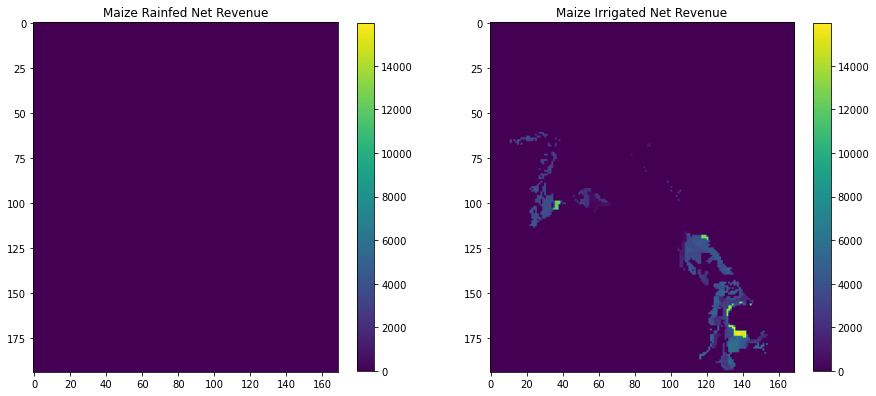

In [16]:
'''visualize result'''

# print('For Rice') Commented out for rice

# plt.imshow(rice_rev)
# plt.colorbar()
# plt.show()
# plt.imshow(rice_rev_class)
# plt.colorbar()
# plt.show()
# plt.imshow(rice_rev_norm)
# plt.colorbar()
# plt.show()


"""For Maize Rainfed and Irrigated comparison"""
plt.figure(1, figsize= (15,8))

plt.subplot(1,2,1)
plt.imshow(maize_rev_rain, vmax = np.max([maize_rev_rain, maize_rev_irr]))
plt.colorbar(shrink=0.8)
plt.title('Maize Rainfed Net Revenue')

plt.subplot(1,2,2)
plt.imshow(maize_rev_irr, vmax = np.max([maize_rev_rain, maize_rev_irr]))
plt.colorbar(shrink=0.8)
plt.title('Maize Irrigated Net Revenue')


Text(0.5, 1.0, 'Maize Irrigated Classified Net Revenue')

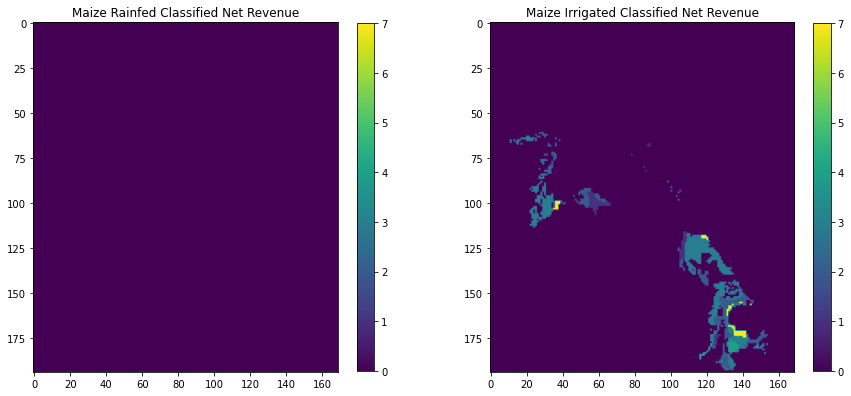

In [18]:
plt.figure(1, figsize= (15,8))
plt.subplot(1,2,1)
plt.imshow(maize_rev_rain_class, vmax = np.max([maize_rev_rain_class, maize_rev_irr_class]))
plt.colorbar(shrink=0.8)
plt.title('Maize Rainfed Classified Net Revenue')

plt.subplot(1,2,2)
plt.imshow(maize_rev_irr_class, vmax = np.max([maize_rev_rain_class, maize_rev_irr_class]))
plt.colorbar(shrink=0.8)
plt.title('Maize Irrigated Classified Net Revenue')


Text(0.5, 1.0, 'Maize Irrigated Normalized Net Revenue')

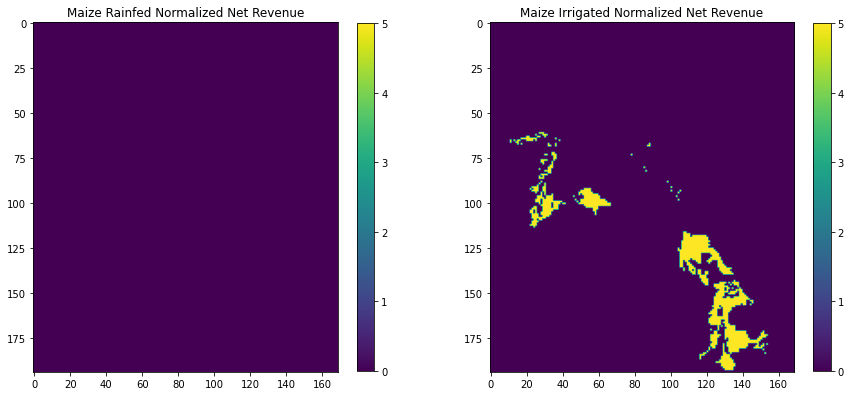

In [19]:
plt.figure(1, figsize= (15,8))

plt.subplot(1,2,1)
plt.imshow(maize_rev_rain_norm, vmax = np.max([maize_rev_rain_norm, maize_rev_irr_norm]))
plt.colorbar(shrink=0.8)
plt.title('Maize Rainfed Normalized Net Revenue')

plt.subplot(1,2,2)
plt.imshow(maize_rev_irr_norm, vmax = np.max([maize_rev_rain_norm, maize_rev_irr_norm]))
plt.colorbar(shrink=0.8)
plt.title('Maize Irrigated Normalized Net Revenue')

In [21]:
# Saving the outputs

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_rain_net_revenue.tif', maize_rev_rain)
obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_irr_net_revenue.tif', maize_rev_irr)

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_rain_net_revenue_class.tif',maize_rev_rain_class)
obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_irr_net_revenue_class.tif',maize_rev_irr_class)

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_rain_norm_net_revenue.tif',maize_rev_rain_norm)
obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB6/maiz_irr_norm_net_revenue.tif',maize_rev_irr_norm)

<hr>

### END OF MODULE 6: ECONOMIC SUITABILITY

<hr>